In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
sheet_1 = pd.read_csv('Sheet_1.csv')
sheet_2 = pd.read_csv('Sheet_2.csv')
sheet_3 = pd.read_csv('Sheet_3.csv')
sheet_4 = pd.read_csv('Sheet_4.csv')

In [15]:
sheet_1.head()

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


In [12]:
sheet_2.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No


In [13]:
sheet_3.head()

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03


In [14]:
sheet_4.head()

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


In [16]:
# Step 1: Merge datasets
sales = sheet_2.merge(sheet_1, on="Item Code", how="left")
sales = sales.merge(sheet_3, on=["Date", "Item Code"], how="left")
sales = sales.merge(sheet_4, on="Item Code", how="left")

In [18]:
sales.head(2)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name_x,Category Code,Category Name,Wholesale Price (RMB/kg),Item Name_y,Loss Rate (%)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum,4.32,Paopaojiao (Jingpin),7.08
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,2.10,Chinese Cabbage,22.27


In [19]:
# Step 2: Calculate metrics
sales['Revenue'] = sales['Quantity Sold (kilo)'] * sales['Unit Selling Price (RMB/kg)']
sales['Cost'] = sales['Quantity Sold (kilo)'] * sales['Wholesale Price (RMB/kg)']
sales['Profit'] = sales['Revenue'] - sales['Cost']
sales['Date'] = pd.to_datetime(sales['Date'])

In [23]:
sales['Revenue'].head(5)


0    3.0096
1    2.7168
2    3.1084
3    4.2100
4    4.3120
Name: Revenue, dtype: float64

In [24]:
sales['Cost'].head(5)

0    1.71072
1    1.78290
2    1.76688
3    2.95963
4    2.47940
Name: Cost, dtype: float64

In [25]:
sales['Profit'].head(5)

0    1.29888
1    0.93390
2    1.34152
3    1.25037
4    1.83260
Name: Profit, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_16528\1142201947.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')


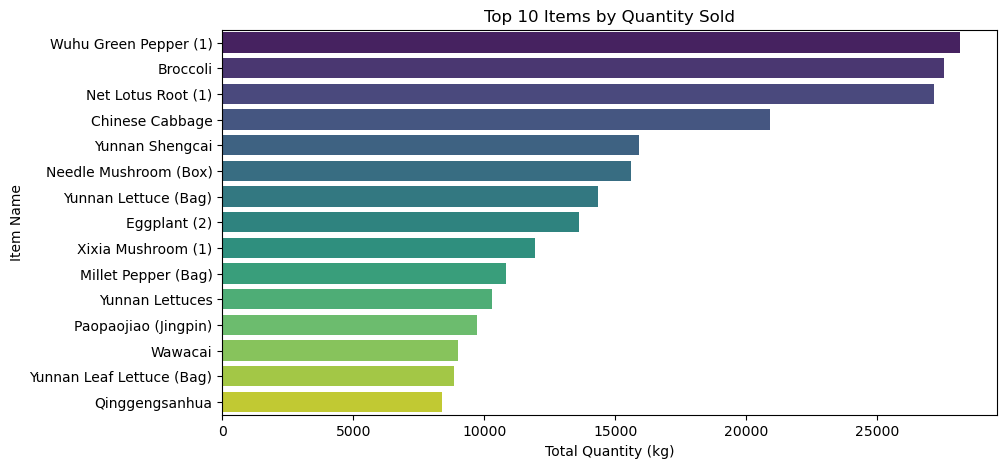

In [36]:
# Step 3: Top Selling Items
top_items = sales.groupby('Item Name_x')['Quantity Sold (kilo)'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
plt.title('Top 10 Items by Quantity Sold')
plt.xlabel('Total Quantity (kg)')
plt.ylabel('Item Name')
plt.show()

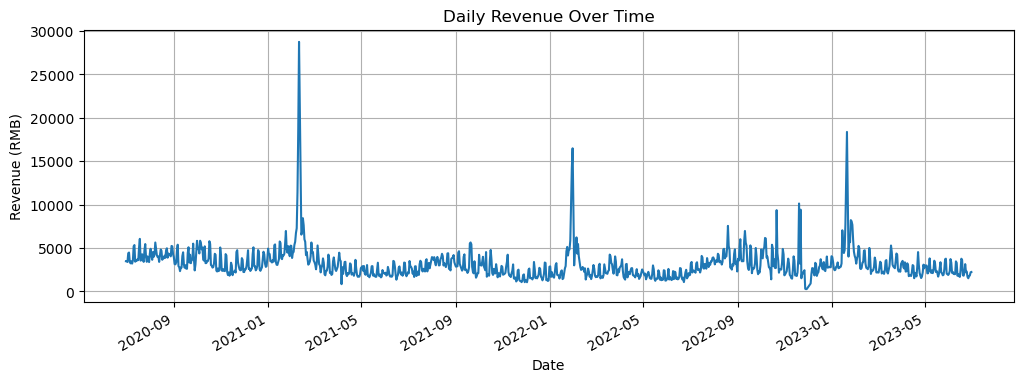

In [32]:
# Step 4: Daily Revenue Trend
daily_revenue = sales.groupby('Date')['Revenue'].sum()
plt.figure(figsize=(12,4))
daily_revenue.plot()
plt.title('Daily Revenue Over Time')
plt.ylabel('Revenue (RMB)')
plt.grid()
plt.show()

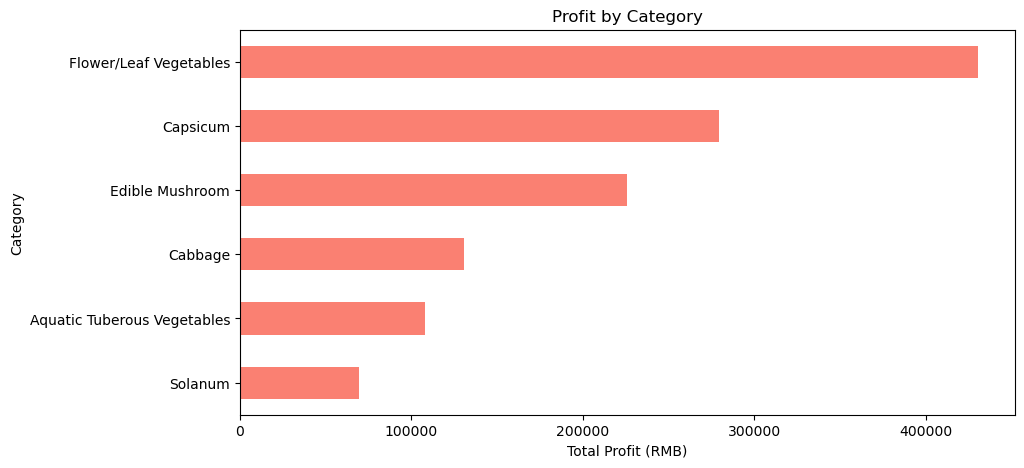

In [33]:
# Step 5: Category-wise Profit
category_profit = sales.groupby('Category Name')['Profit'].sum().sort_values()
category_profit.plot(kind='barh', figsize=(10,5), color='salmon')
plt.title('Profit by Category')
plt.xlabel('Total Profit (RMB)')
plt.ylabel('Category')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_16528\2513400308.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loss Rate (%)', y='Item Name', data=loss_rate, palette='coolwarm')


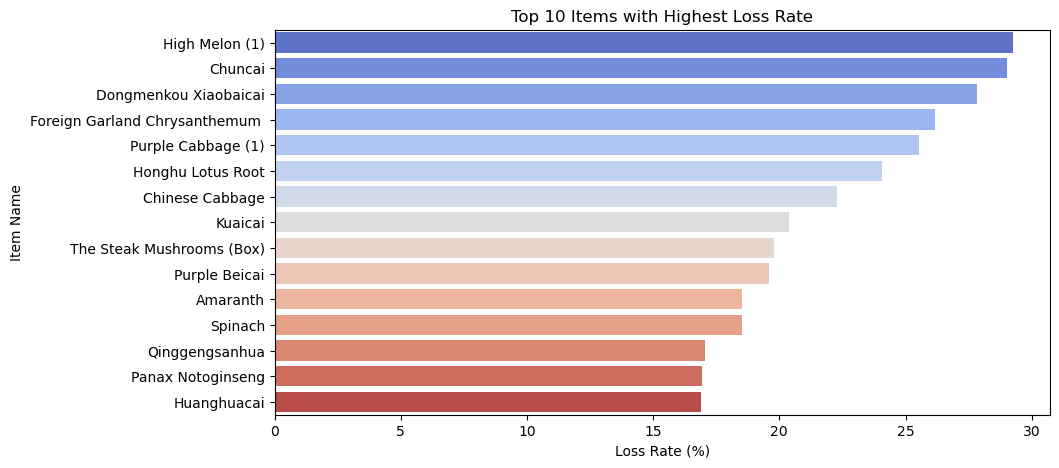

In [35]:
# Step 6: Loss Rate Overview
loss_rate = sheet_4.sort_values(by='Loss Rate (%)', ascending=False).head(15)
plt.figure(figsize=(10,5))
sns.barplot(x='Loss Rate (%)', y='Item Name', data=loss_rate, palette='coolwarm')
plt.title('Top 10 Items with Highest Loss Rate')
plt.show()

In [46]:
## average selling price for each item and each category

avg_selling_price_each_item = sales.groupby(['Item Name_x'])['Unit Selling Price (RMB/kg)'].mean().reset_index()
avg_selling_price_each_item

,Item Name_x,Unit Selling Price (RMB/kg)
0,7 Colour Pepper (1),21.258420
1,7 Colour Pepper (2),24.036767
2,7 Colour Pepper (Bag),5.055556
3,Agaricus Bisporus (Bag),7.980000
4,Agaricus Bisporus (Box),5.346078
...,...,...
237,Zhijiang Red Bolt,6.389384
238,Zhijiang Red Bolt (Bag),2.177636
239,Zhimaxiancai,6.000000
240,Zhuyecai,5.474429


In [45]:
## average selling price for each item and each category

avg_selling_price_each_category = sales.groupby(['Category Name'])['Unit Selling Price (RMB/kg)'].mean().reset_index()
avg_selling_price_each_category

,Category Name,Unit Selling Price (RMB/kg)
0,Aquatic Tuberous Vegetables,9.689851
1,Cabbage,9.138538
2,Capsicum,10.578216
3,Edible Mushroom,12.036941
4,Flower/Leaf Vegetables,6.317257
5,Solanum,8.695459


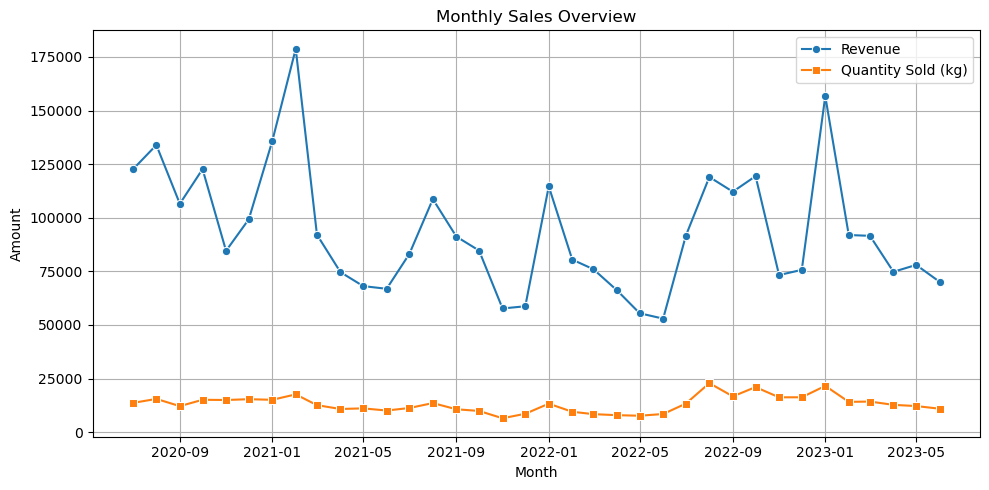

In [53]:
# Merge item names into sales data
sales = sheet_2.merge(sheet_1, on="Item Code", how="left")

# Convert Date column to datetime
sales['Date'] = pd.to_datetime(sales['Date'])

# Create a 'Month' column (format: YYYY-MM)
sales['Month'] = sales['Date'].dt.to_period('M')

# Calculate monthly total quantity sold and revenue
sales['Revenue'] = sales['Quantity Sold (kilo)'] * sales['Unit Selling Price (RMB/kg)']
monthly_data = sales.groupby('Month').agg({
    'Quantity Sold (kilo)': 'sum',
    'Revenue': 'sum'
}).reset_index()

# Convert Month back to datetime for plotting
monthly_data['Month'] = monthly_data['Month'].dt.to_timestamp()

# Plot: Monthly Revenue
plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='Revenue', data=monthly_data, marker='o', label='Revenue')
sns.lineplot(x='Month', y='Quantity Sold (kilo)', data=monthly_data, marker='s', label='Quantity Sold (kg)')
plt.title("Monthly Sales Overview")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


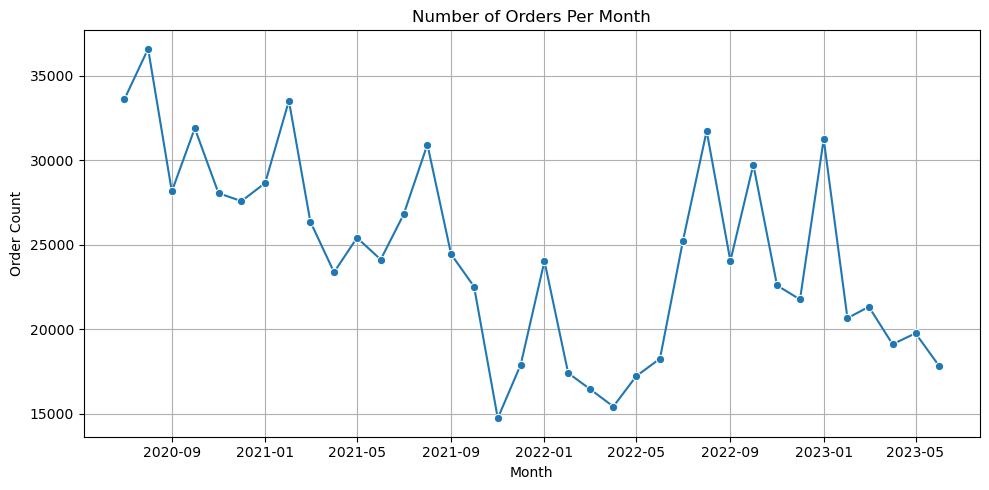

In [54]:
# Convert Date column to datetime
sheet_2['Date'] = pd.to_datetime(sheet_2['Date'])

# Extract Month in YYYY-MM format
sheet_2['Month'] = sheet_2['Date'].dt.to_period('M')

# Count orders per month (each row = 1 order line)
monthly_orders = sheet_2.groupby('Month').size().reset_index(name='Order Count')

# Convert Month to datetime for plotting
monthly_orders['Month'] = monthly_orders['Month'].dt.to_timestamp()

# Plot orders per month
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_orders, x='Month', y='Order Count', marker='o')
plt.title('Number of Orders Per Month')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_16528\1354511685.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_comparison, x='Discounted', y='Total Revenue', palette='pastel')


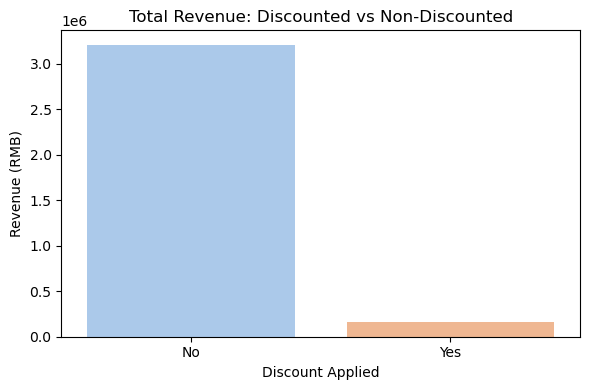

In [56]:
# Group by Discount status and sum revenue
discount_comparison = sheet_2.groupby('Discount (Yes/No)')['Revenue'].sum().reset_index()

# Rename for clarity
discount_comparison.columns = ['Discounted', 'Total Revenue']

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=discount_comparison, x='Discounted', y='Total Revenue', palette='pastel')
plt.title('Total Revenue: Discounted vs Non-Discounted')
plt.ylabel('Revenue (RMB)')
plt.xlabel('Discount Applied')
plt.tight_layout()
plt.show()
